https://www.geeksforgeeks.org/python-classifying-handwritten-digits-with-tensorflow/?ref=lbp

In [2]:
import numpy as np
import tensorflow as tf

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 784)).astype("float32") / 255
test_images = test_images.reshape((-1, 784)).astype("float32") / 255

# Define a simple linear model
class LinearModel(tf.Module):
    def __init__(self, num_outputs):
        self.W = tf.Variable(tf.random.normal([784, num_outputs]), name='weights')
        self.b = tf.Variable(tf.zeros([num_outputs]), name='biases')

    def __call__(self, x):
        return tf.matmul(x, self.W) + self.b

# Instantiate the model
model = LinearModel(10)

# Define loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Training loop
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Train the model
for epoch in range(10):
    for batch in range(0, len(train_images), 32):
        batch_images = train_images[batch:batch+32]
        batch_labels = train_labels[batch:batch+32]
        loss = train_step(model, batch_images, batch_labels)
    print(f"Epoch {epoch}: Loss: {loss.numpy()}")

# Evaluate accuracy
def evaluate(model, images, labels):
    predictions = model(images)
    predicted_labels = tf.argmax(predictions, axis=1, output_type=tf.int32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, labels), dtype=tf.float32))
    return accuracy.numpy()

accuracy = evaluate(model, test_images, test_labels)
print(f"Accuracy: {accuracy}")

# Make a prediction
sample_image = test_images[0]
sample_label = test_labels[0]
prediction = tf.argmax(model(np.array([sample_image])), axis=1, output_type=tf.int32)
print(f"Prediction: {prediction.numpy()[0]}, Actual Label: {sample_label}")


Epoch 0: Loss: 0.5214914083480835
Epoch 1: Loss: 0.2918941378593445
Epoch 2: Loss: 0.24606776237487793
Epoch 3: Loss: 0.22877469658851624
Epoch 4: Loss: 0.2164953052997589
Epoch 5: Loss: 0.20536422729492188
Epoch 6: Loss: 0.195896178483963
Epoch 7: Loss: 0.18833646178245544
Epoch 8: Loss: 0.18153116106987
Epoch 9: Loss: 0.17522597312927246
Accuracy: 0.9014000296592712
Prediction: 7, Actual Label: 7


tf.keras

In [3]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:


mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()
 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

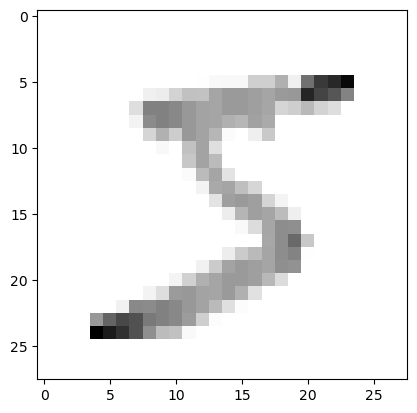

In [5]:


def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show() 
     
draw(x_train[0])

In [6]:
model = tf.keras.models.Sequential()
 
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape
 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9249
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1037 - accuracy: 0.9682
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9771


In [7]:


val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9694
loss->  0.09814944863319397 
acc->  0.9693999886512756


313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


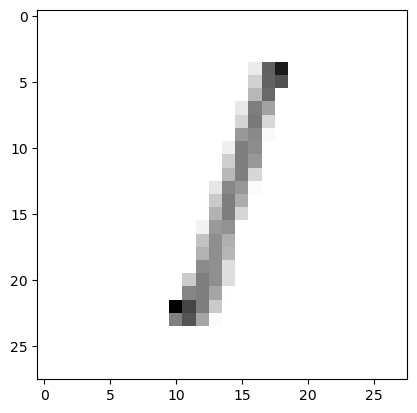

In [8]:


predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))
 
draw(x_test[2])

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9694
Test Accuracy: 96.93999886512756%


In [10]:
model.save('epic_num_reader.h5')

C:\Users\manit\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:


new_model = tf.keras.models.load_model('epic_num_reader.h5')

313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


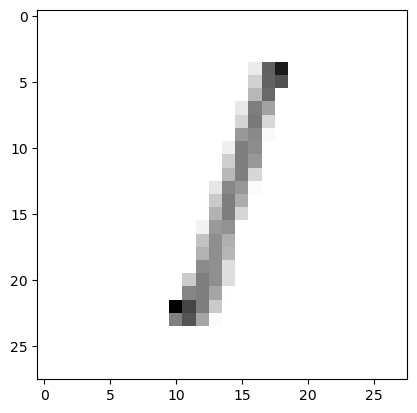

In [12]:


predictions=new_model.predict([x_test])
 
 
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))
 
draw(x_test[2])

sckit learn https://www.geeksforgeeks.org/recognizing-handwritten-digits-in-scikit-learn/?ref=lbp

In [13]:

# importing the hand written digit dataset
from sklearn import datasets
 
# digit contain the dataset
digits = datasets.load_digits()
 
# dir function use to display the attributes of the dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [15]:
# importing the matplotlib libraries pyplot function
import matplotlib.pyplot as plt
# defining the function plot_multi
 
def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    # printing the each digits in the dataset.
    plt.show()
 
    plot_multi(0)

In [16]:

# converting the 2 dimensional array to one dimensional array
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
 
# gives the  shape of the data
x.shape

(1797, 64)

In [17]:

# printing the one-dimensional array's values
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:

# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]
 
# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

In [19]:

# importing the MLP classifier from sklearn
from sklearn.neural_network import MLPClassifier
 
# calling the MLP classifier with specific parameters
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

In [20]:

mlp.fit(x_train, y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

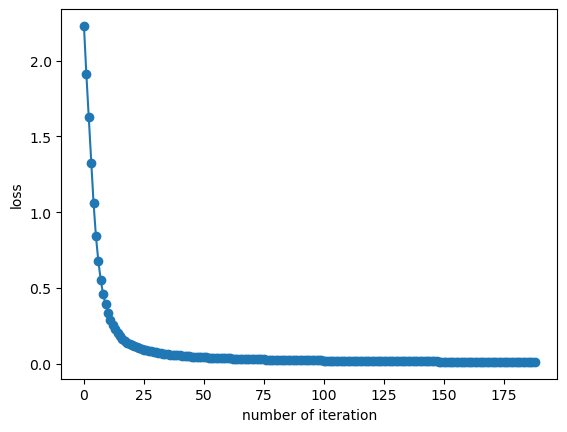

In [21]:

fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [22]:

predictions = mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [23]:

y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [24]:

# importing the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score
 
# calculating the accuracy with y_test and predictions
accuracy_score(y_test, predictions)

0.9146800501882058

Neural Network https://www.geeksforgeeks.org/handwritten-digit-recognition-using-neural-network/?ref=lbp

you also need GUI,Model,Prediction and Randinitialize.py files to run the below code

In [27]:
from scipy.io import loadmat
import numpy as np
from Model import neural_network
from RandInitialize import initialise
from Prediction import predict
from scipy.optimize import minimize


# Loading mat file
data = loadmat('mnist-original.mat')

# Extracting features from mat file
X = data['data']
X = X.transpose()

# Normalizing the data
X = X / 255

# Extracting labels from mat file
y = data['label']
y = y.flatten()

# Splitting data into training set with 60,000 examples
X_train = X[:60000, :]
y_train = y[:60000]

# Splitting data into testing set with 10,000 examples
X_test = X[60000:, :]
y_test = y[60000:]

m = X.shape[0]
input_layer_size = 784 # Images are of (28 X 28) px so there will be 784 features
hidden_layer_size = 100
num_labels = 10 # There are 10 classes [0, 9]

# Randomly initialising Thetas
initial_Theta1 = initialise(hidden_layer_size, input_layer_size)
initial_Theta2 = initialise(num_labels, hidden_layer_size)

# Unrolling parameters into a single column vector
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))
maxiter = 100
lambda_reg = 0.1 # To avoid overfitting
myargs = (input_layer_size, hidden_layer_size, num_labels, X_train, y_train, lambda_reg)

# Calling minimize function to minimize cost function and to train weights
results = minimize(neural_network, x0=initial_nn_params, args=myargs, 
		options={'disp': True, 'maxiter': maxiter}, method="L-BFGS-B", jac=True)

nn_params = results["x"] # Trained Theta is extracted

# Weights are split back to Theta1, Theta2
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], (
							hidden_layer_size, input_layer_size + 1)) # shape = (100, 785)
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], 
					(num_labels, hidden_layer_size + 1)) # shape = (10, 101)

# Checking test set accuracy of our model
pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy: {:f}'.format((np.mean(pred == y_test) * 100)))

# Checking train set accuracy of our model
pred = predict(Theta1, Theta2, X_train)
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y_train) * 100)))

# Evaluating precision of our model
true_positive = 0
for i in range(len(pred)):
	if pred[i] == y_train[i]:
		true_positive += 1
false_positive = len(y_train) - true_positive
print('Precision =', true_positive/(true_positive + false_positive))

# Saving Thetas in .txt file
np.savetxt('Theta1.txt', Theta1, delimiter=' ')
np.savetxt('Theta2.txt', Theta2, delimiter=' ')


Test Set Accuracy: 97.480000
Training Set Accuracy: 99.471667
Precision = 0.9947166666666667


In [29]:
import tkinter
tkinter._test()